In [1]:
import os
import csv
import pandas as pd
import numpy as np
from tools.segmentation.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
from mrcnn import visualize
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from dicom_to_cnn.tools.cleaning_dicom.folders import * 

In [2]:
csv_pred_path = '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/prediction_dataset_probs.csv'
df = pd.read_csv(csv_pred_path)

In [3]:
df.head()

,patient_id,study_id,study,ct_img,pet_img,mask_img,pred_img
0,53011101841003,1.2.250.1.199.10.90001.93080.20120515093605,ahl,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...
1,53011101881011,1.2.250.1.199.10.90001.97031.20130222102728,ahl,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...
2,53011101841011,1.2.250.1.199.10.90001.97274.20140120115149,ahl,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...
3,53011101881007,1.2.250.1.199.10.90001.98250.20120824131623,ahl,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...
4,53011101871009,1.2.250.1.38.2.1.102.130708113824.102392945,ahl,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...,/media/oncopole/d508267f-cc7d-45e2-ae24-9456e0...


In [3]:
study = []
number = []
for idx,name in enumerate(df['study'].value_counts().index.tolist()):
    #print('Study:', name)
    study.append(name)
    #print('Number :', df['study'].value_counts()[idx])
    number.append(df['study'].value_counts()[idx])
print(study)
print(number)

percent = []
for s, n in zip(study, number):
    print(s)
    print("{} % ".format(round(n/np.sum(number)*100,2)))
    print('')
    percent.append(round(n/np.sum(number)*100,2))

['ahl', 'gained', 'pvab', 'relevance', 'remarc', 'flip', 'lnh073b']
[109, 89, 74, 44, 28, 18, 7]
ahl
29.54 % 

gained
24.12 % 

pvab
20.05 % 

relevance
11.92 % 

remarc
7.59 % 

flip
4.88 % 

lnh073b
1.9 % 



In [3]:
dataset = df.values.tolist()
print("NUMBER OF INFERENCE : ", len(dataset))

NUMBER OF INFERENCE :  369


In [4]:
#GLOBAL DICE WITHOUT THRESHOLD 
for inference in dataset : 
    print(inference[6])
    print(dataset.index(inference)) 
    pred_array, _ = get_array_from_nifti(inference[6])
    true_array, _ = get_array_from_nifti(inference[5])
    pet_array, spacing = get_array_from_nifti(inference[4])
    true_array = multi_seuil_mask(true_array, pet_array)
    dice = calcul_dice_global(pred_array, true_array)
    print(dice)
    inference.append(dice[0])
    filename = inference[1]
    write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2', filename, inference)

16.1361458815.40_inference_pred.nii
270
[0.94699837]
/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.250.1.59.470.940100027.1.20130711133107.1697.19981_inference_pred.nii
271
[0.8699142]
/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.840.113704.1.111.4144.1374056026.9_inference_pred.nii
272
[0.28384736]
/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.840.113619.2.290.3.2831176195.13.1349243572.605_inference_pred.nii
273
[0.75116965]
/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.840.113711.93413733.15700.402919425.26.2116281012.10_inference_pred.nii
274
[0.77421216]
/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.840.113711.93413733.15

In [6]:
directory ='/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2'
liste_json = os.listdir(directory)
full_liste = []
for json_file in liste_json : 
    full_liste.append(os.path.join(directory, json_file))

print(len(full_liste)) #must be 369
dataset = []
for json_file in full_liste : 
    with open(json_file) as json_file : 
        reader = json.load(json_file)
        dataset.append(reader)
print(dataset[0])
filename = 'inference_dice_dataset_v2.csv'

with open(os.path.join(directory, filename), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["patient_id", "study_uid", "study", "ct_img", "pet_img", "mask_img", "pred_img", "dice"])
    for serie in dataset: 
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6], serie[7]])

369
['11009101226024', '1.2.840.113619.2.290.3.2831176195.889.1347256864.951', 'remarc', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/REMARC_NIFTI/11009101226024/V0/1.2.840.113619.2.290.3.2831176195.889.1347256864.951_nifti_CT.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/REMARC_NIFTI/11009101226024/V0/1.2.840.113619.2.290.3.2831176195.889.1347256864.951_nifti_PT.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/REMARC_NIFTI/11009101226024/V0/1.2.840.113619.2.290.3.2831176195.889.1347256864.951_nifti_mask_3d.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti_probs/1.2.840.113619.2.290.3.2831176195.889.1347256864.951_inference_pred.nii', 0.7468123606065282]


In [ ]:
#DICE 
seuil = [0.41, 2.5, 4.0]
for inference in dataset:
    print(inference[6])
    print(dataset.index(inference)) 
    pet_array, spacing = get_array_from_nifti(inference[4])
    array = sitk.GetArrayFromImage(sitk.ReadImage(inference[-1]))
    if int(np.max(array)) != 1 : #pas de segmentation faite avec le model 
        inference.append(0)
        inference.append(0)
        inference.append(0)
        filename = inference[1]+'_'+str(s)
        write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2', filename, inference)
    else : 
        for s in seuil : 
            if s == 0.41 : 
                ws_img = applied_watershed_on_inference(inference[6], inference[4])
                pred_array = sitk.GetArrayFromImage(ws_img)
                true_array, _ = get_array_from_nifti(inference[5]) 
                dice = calcul_dice_threshold(pred_array, true_array, pet_array, thresh = s)
                inference.append(dice[0])
                filename = inference[1]+'_'+str(s)
                write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2', filename, inference)
                print(dice)
                
            else : 
                
                pred_array, _ = get_array_from_nifti(inference[6])
                true_array, _ = get_array_from_nifti(inference[5])
                dice = calcul_dice_threshold(pred_array, true_array, pet_array, thresh = s)
                inference.append(dice[0])
                filename = inference[1]+'_'+str(s)
                write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2', filename, inference)
                print(dice)
            

In [8]:
#csv_dice 

directory ='/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice'
liste_json = os.listdir(directory)
full_liste = []
for json_file in liste_json : 
    if '_4.0' in json_file : 
        full_liste.append(os.path.join(directory, json_file))

print(len(full_liste)) #must be 369
dataset = []
for json_file in full_liste : 
    with open(json_file) as json_file : 
        reader = json.load(json_file)
        dataset.append(reader)
print(dataset[0])
filename = 'inference_dice_dataset.csv'

with open(os.path.join(directory, filename), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["patient_id", "study_uid", "study", "ct_img", "pet_img", "mask_img", "pred_img", "dice_0.41", "dice_2.5", "dice_4.0"])
    for serie in dataset: 
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6], serie[7], serie[8], serie[9]])

369
['13014101033004', '1.2.276.0.7230010.3.1.2.413926400.1.1606832291.400127', 'pvab', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/PVAB_NIFTI/13014101033004/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606832291.400127_nifti_CT.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/PVAB_NIFTI/13014101033004/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606832291.400127_nifti_PT.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/NIFTI/PVAB_NIFTI/13014101033004/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606832291.400127_nifti_mask_3d.nii', '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/nifti/1.2.276.0.7230010.3.1.2.413926400.1.1606832291.400127_inference_pred.nii', 0.6382009678337603, 0.5772762318637416, 0.8482137737255576]


In [6]:
#TMTV
seuil = [0.41, 2.5, 4.0]
for inference in dataset : 
    print(dataset.index(inference))
    pet_array, spacing = get_array_from_nifti(inference[4])
    for s in seuil : 
        if s == 0.41 : 
            #Watershed
            ws_img = applied_watershed_on_inference(inference[6], inference[4])
            pred_array = sitk.GetArrayFromImage(ws_img)
            true_array, _ = get_array_from_nifti(inference[5]) 
            tmtv_pred, tmtv_true = calcul_tmtv(pred_array, true_array, pet_array, spacing, thresh = s)
            inference.append(tmtv_pred)
            inference.append(tmtv_true)
            filename = inference[1]+'_'+str(s)
            write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/tmtv', filename, inference)
            #print("tmtv_pred :", tmtv_pred)
            #print("tmtv_true :", tmtv_true)
            
        else : 
            
            pred_array, _ = get_array_from_nifti(inference[6])
            true_array, _ = get_array_from_nifti(inference[5])
            tmtv_pred, tmtv_true = calcul_tmtv(pred_array, true_array, pet_array, spacing, thresh = s)
            inference.append(tmtv_pred)
            inference.append(tmtv_true)
            filename = inference[1]+'_'+str(s)
            write_json_file('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/tmtv', filename, inference)
            #print("tmtv_pred :", tmtv_pred)
            #print("tmtv_true :", tmtv_true)
           


169
(324, 168, 168)
(324, 168, 168)
(324, 168, 168)
(324, 168, 168)
(324, 168, 168)
(324, 168, 168)
170
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
171
(419, 200, 200)
(419, 200, 200)
(419, 200, 200)
(419, 200, 200)
(419, 200, 200)
(419, 200, 200)
172
(397, 200, 200)
(397, 200, 200)
(397, 200, 200)
(397, 200, 200)
(397, 200, 200)
(397, 200, 200)
173
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
174
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
(481, 200, 200)
175
(335, 256, 256)
(335, 256, 256)
(335, 256, 256)
(335, 256, 256)
(335, 256, 256)
(335, 256, 256)
176
(587, 256, 256)
(587, 256, 256)
(587, 256, 256)
(587, 256, 256)
(587, 256, 256)
(587, 256, 256)
177
(255, 144, 144)
(255, 144, 144)
(255, 144, 144)
(255, 144, 144)
(255, 144, 144)
(255, 144, 144)
178
(255, 169, 169)
(255, 169, 169)
(255, 169, 169)
(255, 169, 169)
(255, 169, 169)
(255, 169, 169)


In [9]:
#csv_tmtv

directory = '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/tmtv'
liste_json = os.listdir(directory)
full_liste = []
for json_file in liste_json : 
    if '_4.0' in json_file : 
        full_liste.append(os.path.join(directory, json_file))

print(len(full_liste)) #must be 369
dataset = []
for json_file in full_liste : 
    with open(json_file) as json_file : 
        reader = json.load(json_file)
        dataset.append(reader)
filename = 'inference_tmtv_dataset.csv'

with open(os.path.join(directory, filename), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["patient_id", "study_uid", "study", "ct_img", "pet_img", "mask_img", "pred_img", "pred_0.41", "true_0.41", "pred_2.5", "true_2.5", "pred_4.0", "true_4.0"])
    for serie in dataset: 
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6], serie[7], serie[8], serie[9], serie[10], serie[11], serie[12]])

369


In [8]:
#STATS ON GLOBAL DICE 
#STATS ON DICE THRESHOLD
import numpy as np
csv_path= '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice_v2/inference_dice_dataset_v2.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)
        
del dataset[0] #enlever première ligne

dice = []
for row in dataset : 
    dice.append(float(row[-1]))

print('stats on segmentation : ')
print("dice max : ", np.max(dice))
print("dice min :", np.min(dice))
print('dice mean :', np.mean(dice))
print('dice median :' , np.median(dice))
print('dice std :', np.std(dice))
print('')

stats on segmentation : 
dice max :  0.975199621777873
dice min : 1.3166383589419494e-05
dice mean : 0.7411008627230646
dice median : 0.7801595351004632
dice std : 0.16818296769975502



In [12]:
#STATS ON DICE THRESHOLD
csv_path= '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/dice/inference_dice_dataset.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)
        
del dataset[0] #enlever première ligne

dice_0_41 = []
dice_2_5 = []
dice_4_0 = []
small_dice = []
for row in dataset : 
    #if row[-3] <= '0.4' or row[-2] <= '0.4' or row[-1] <= '0.4' : 
     #   small_dice.append(row)
    #else : 
    dice_0_41.append(float(row[-3]))
    dice_2_5.append(float(row[-2]))
    dice_4_0.append(float(row[-1]))
print(len(dice_0_41))
print(len(dice_2_5))
print(len(dice_4_0))


369
369
369


In [ ]:
#287/369 qui ont un dice plus grand que 0.5 sur une des trois segmentation
#21/369 qui ont un dice plus grand que 0.3 sur une des trois segmentation
#336/369 qui ont un dice plus grand que 0.3 sur une des trois segmentation

In [13]:
print('stats on 0.41 segmentation : ')
print("dice max : ", np.max(dice_0_41))
print("dice min :", np.min(dice_0_41))
print('dice mean :', np.mean(dice_0_41))
print('dice median :' , np.median(dice_0_41))
print('')
print('')
print('stats on 2.5 segmentation : ')
print("dice max : ", np.max(dice_2_5))
print("dice min :", np.min(dice_2_5))
print('dice mean :', np.mean(dice_2_5))
print('dice median :' , np.median(dice_2_5))
print('')
print('')
print('stats on 4.0 segmentation : ')
print("dice max : ", np.max(dice_4_0))
print("dice min :", np.min(dice_4_0))
print('dice mean :', np.mean(dice_4_0))
print('dice median :' , np.median(dice_4_0))


#dice moyen : 
print('')
print('')
print('mean dice on every segmentation :', (np.mean(dice_0_41)+np.mean(dice_2_5)+np.mean(dice_4_0)) / 3)
print('mean of median dice on every segmentation :', (np.median(dice_0_41)+ np.median(dice_2_5)+np.median(dice_4_0)) / 3)

stats on 0.41 segmentation : 
dice max :  1.0
dice min : 0.0
dice mean : 0.7139121399057606
dice median : 0.7647750927685764


stats on 2.5 segmentation : 
dice max :  0.9640088685881941
dice min : 0.0
dice mean : 0.6857638509947681
dice median : 0.7162201094785364


stats on 4.0 segmentation : 
dice max :  1.0
dice min : 0.0
dice mean : 0.8606571490249905
dice median : 0.9068351522113728


mean dice on every segmentation : 0.7534443799751731
mean of median dice on every segmentation : 0.795943451486162


In [14]:
#STATS ON TMTV 
csv_path= '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/tmtv/inference_tmtv_dataset.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)
        
del dataset[0] #enlever première ligne


tmtv_0_41_pred = []
tmtv_2_5_pred = []
tmtv_4_0_pred = []
tmtv_0_41_true = []
tmtv_2_5_true = []
tmtv_4_0_true = []

for row in dataset : 
    tmtv_0_41_pred.append(float(row[-6]))#pred 0.41
    tmtv_0_41_true.append(float(row[-5]))#true 0.41
    tmtv_2_5_pred.append(float(row[-4]))#pred 2.5
    tmtv_2_5_true.append(float(row[-3]))#true 2.5
    tmtv_4_0_pred.append(float(row[-2])) #pred 4.0
    tmtv_4_0_true.append(float(row[-1]))#true 4.0

print(len(tmtv_0_41_pred))
print(len(tmtv_0_41_true))
print(len(tmtv_2_5_pred))
print(len(tmtv_2_5_true))
print(len(tmtv_4_0_pred))
print(len(tmtv_4_0_true))

369
369
369
369
369
369


In [15]:
print('stats on tmtv 0.41 : ')
stats_0_41 = []
maxi = calcul_max_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
mini = calcul_min_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
mean_ = calcul_mean_on_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
median_ = calcul_median_on_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
sd = calcul_sd_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
q1 = calcul_q1_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
q3 =  calcul_q3_tmtv(tmtv_0_41_pred, tmtv_0_41_true)
stats_0_41.append(maxi)
stats_0_41.append(mini)
stats_0_41.append(mean_)
stats_0_41.append(median_)
stats_0_41.append(sd)
stats_0_41.append(q1)
stats_0_41.append(q3)
print('max :', maxi)
print('min :', mini)
print('mean :', mean_)
print('median :', median_)
print('sd :', sd)
print('q1 : ', q1)
print('q3 :', q3)
print('')
print('')

print('stats on tmtv 2.5 : ')
stats_2_5 = []
maxi = calcul_max_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
mini = calcul_min_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
mean_ = calcul_mean_on_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
median_ = calcul_median_on_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
sd = calcul_sd_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
q1 = calcul_q1_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
q3 =  calcul_q3_tmtv(tmtv_2_5_pred, tmtv_2_5_true)
stats_2_5.append(maxi)
stats_2_5.append(mini)
stats_2_5.append(mean_)
stats_2_5.append(median_)
stats_2_5.append(sd)
stats_2_5.append(q1)
stats_2_5.append(q3)
print('max :', maxi)
print('min :', mini)
print('mean :', mean_)
print('median :', median_)
print('sd :', sd)
print('q1 : ', q1)
print('q3 :', q3)
print('')
print('')

print('stats on tmtv 4.0 : ')
stats_4_0 = []
maxi = calcul_max_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
mini = calcul_min_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
mean_ = calcul_mean_on_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
median_ = calcul_median_on_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
sd = calcul_sd_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
q1 = calcul_q1_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
q3 =  calcul_q3_tmtv(tmtv_4_0_pred, tmtv_4_0_true)
stats_4_0.append(maxi)
stats_4_0.append(mini)
stats_4_0.append(mean_)
stats_4_0.append(median_)
stats_4_0.append(sd)
stats_4_0.append(q1)
stats_4_0.append(q3)
print('max :', maxi)
print('min :', mini)
print('mean :', mean_)
print('median :', median_)
print('sd :', sd)
print('q1 : ', q1)
print('q3 :', q3)

stats on tmtv 0.41 : 
max : (3679.616, 3828.544)
min : (0.0, 2.273771654217853)
mean : (328.76465078936474, 379.37041757759835)
median : (197.7077405184952, 233.171615766405)
sd : (404.5360379901698, 464.9294443912444)
q1 :  (89.08800000000001, 108.41599353790284)
q3 : (395.0719764518738, 421.01449339388637)


stats on tmtv 2.5 : 
max : (3813.632, 3960.5545366142246)
min : (0.0, 2.730376197723672)
mean : (415.4931046132621, 601.963530947835)
median : (268.7999839782715, 399.7865705382497)
sd : (496.97116358572134, 647.9541014633214)
q1 :  (114.11905974826067, 191.168)
q3 : (502.464, 746.4816789954784)


stats on tmtv 4.0 : 
max : (3230.867387075049, 3221.8601324841334)
min : (0.0, 0.0)
mean : (347.3558287228589, 372.62235438212065)
median : (199.08949011070945, 225.27922814182276)
sd : (458.2639976733855, 475.05928258510676)
q1 :  (75.648, 82.496)
q3 : (400.192, 459.4241199398675)


In [ ]:
#BOXPLOT

738


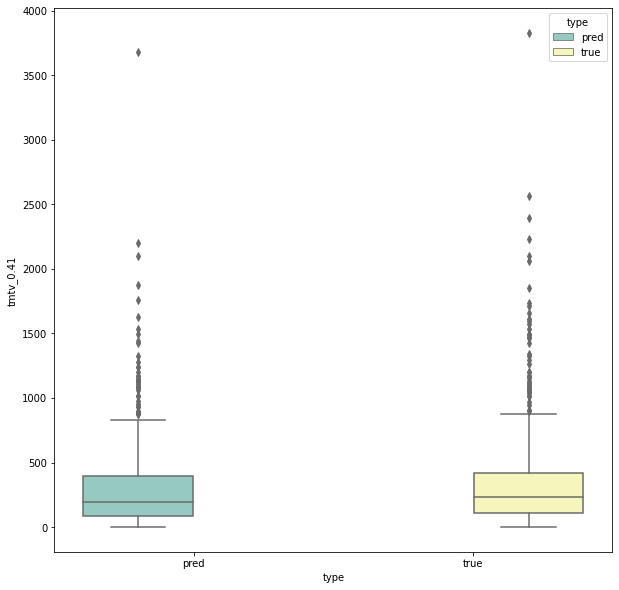

In [16]:
import pandas as pd 
type_ = []
for i in range(369):
    type_.append('pred')
for i in range(369):
    type_.append('true')
print(len(type_))

df = pd.DataFrame([tmtv_0_41_pred+ tmtv_0_41_true, type_]).transpose()
df.columns = ['tmtv_0.41', 'type']
df
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
ax = sns.boxplot(x="type", y="tmtv_0.41", hue="type",
                 data=df, palette="Set3")

738


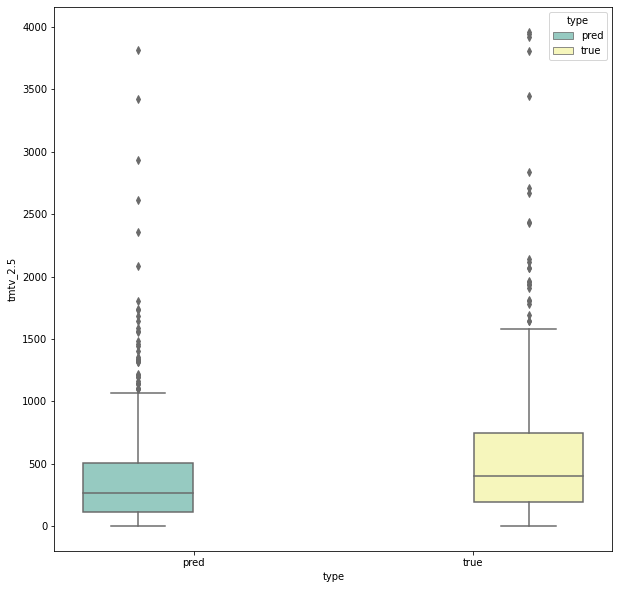

In [17]:
type_ = []
for i in range(369):
    type_.append('pred')
for i in range(369):
    type_.append('true')
print(len(type_))

df = pd.DataFrame([tmtv_2_5_pred+ tmtv_2_5_true, type_]).transpose()
df.columns = ['tmtv_2.5', 'type']
df
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
ax = sns.boxplot(x="type", y="tmtv_2.5", hue="type",
                 data=df, palette="Set3")

738


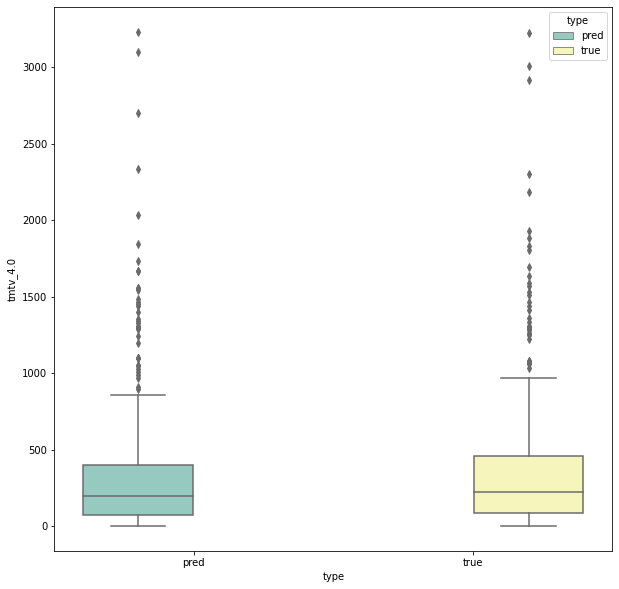

In [18]:
type_ = []
for i in range(369):
    type_.append('pred')
for i in range(369):
    type_.append('true')
print(len(type_))

df = pd.DataFrame([tmtv_4_0_pred+ tmtv_4_0_true, type_]).transpose()
df.columns = ['tmtv_4.0', 'type']
df
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
ax = sns.boxplot(x="type", y="tmtv_4.0", hue="type",
                 data=df, palette="Set3")

(0.9070548644527666, 5.993250066224901e-140)


Text(0.5, 1.0, 'Corrélation tmtv pred/manual on 0.41 segmentation')

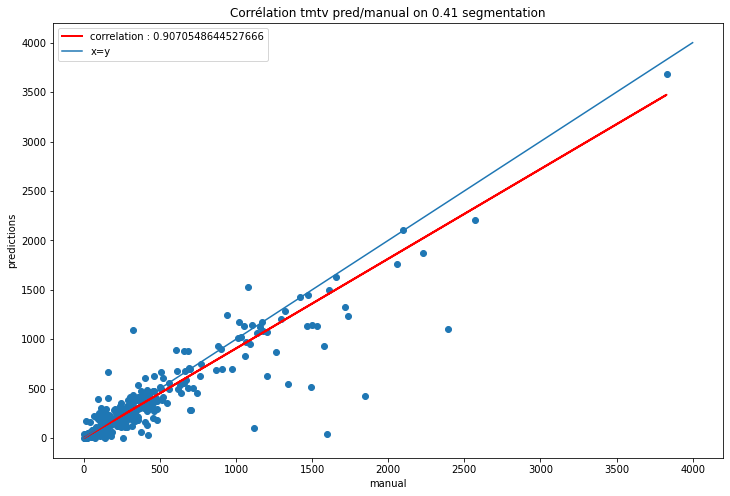

In [19]:
#correlation 
#0.41 
import scipy.stats as ss 


correlation = ss.pearsonr(tmtv_0_41_true, tmtv_0_41_pred)
print(correlation)
line = []
for x in tmtv_0_41_true : 
    line.append(x*correlation[0] + correlation[1])

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(tmtv_0_41_true, tmtv_0_41_pred)
plt.plot(tmtv_0_41_true, line, linewidth = 2, color='red', label='correlation : {}'.format(correlation[0]))
plt.plot([0,4000], [0,4000], label='x=y')
plt.legend(loc='upper left')
plt.xlabel('manual')
plt.ylabel('predictions')
plt.title('Corrélation tmtv pred/manual on 0.41 segmentation')

(0.9149746657939793, 1.0155746188876693e-146)


Text(0.5, 1.0, 'Corrélation tmtv pred/manual on 2_5 segmentation')

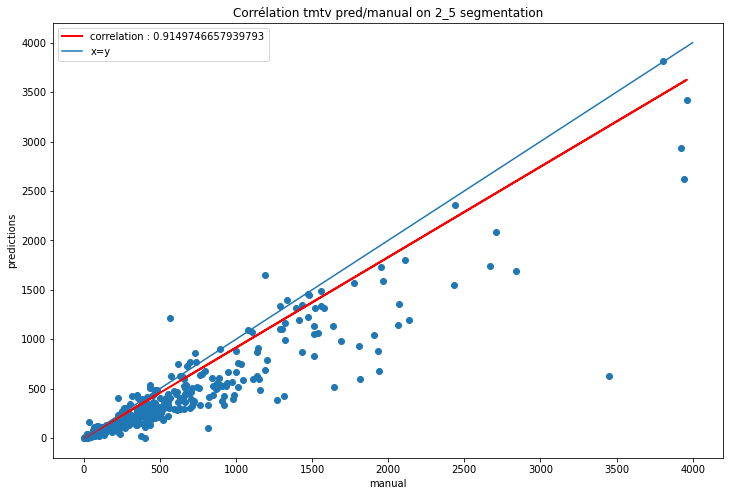

In [20]:
#2.5 
correlation = ss.pearsonr(tmtv_2_5_true, tmtv_2_5_pred)
print(correlation)
line = []
for x in tmtv_2_5_true : 
    line.append(x*correlation[0] + correlation[1])

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(tmtv_2_5_true, tmtv_2_5_pred)
plt.plot(tmtv_2_5_true, line, linewidth = 2, color='red', label='correlation : {}'.format(correlation[0]))
plt.plot([0,4000], [0,4000], label='x=y')
plt.legend(loc='upper left')
plt.xlabel('manual')
plt.ylabel('predictions')
plt.title('Corrélation tmtv pred/manual on 2_5 segmentation')

(0.9806523561828056, 4.878848626739933e-262)


Text(0.5, 1.0, 'Corrélation tmtv pred/manual on 4.0 segmentation')

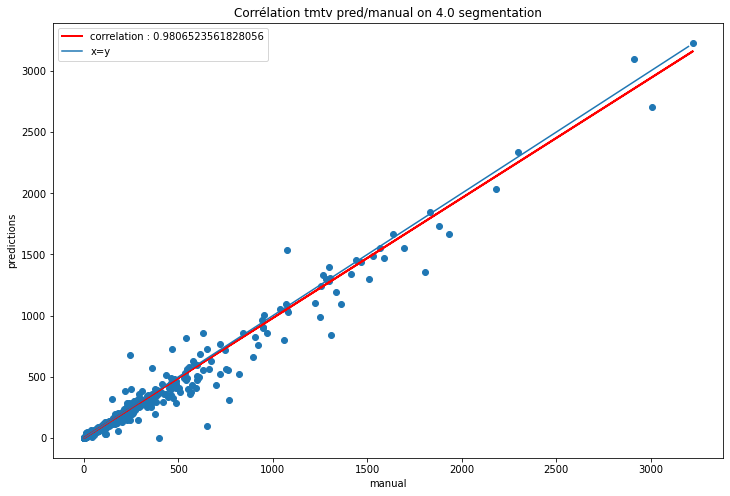

In [21]:
correlation = ss.pearsonr(tmtv_4_0_true, tmtv_4_0_pred)
print(correlation)
line = []
for x in tmtv_4_0_true : 
    line.append(x*correlation[0] + correlation[1])

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(tmtv_4_0_true, tmtv_4_0_pred)
plt.plot(tmtv_4_0_true, line, linewidth = 2, color='red', label='correlation : {}'.format(correlation[0]))
plt.plot([0,3200], [0,3200], label='x=y')
plt.legend(loc='upper left')
plt.xlabel('manual')
plt.ylabel('predictions')
plt.title('Corrélation tmtv pred/manual on 4.0 segmentation')

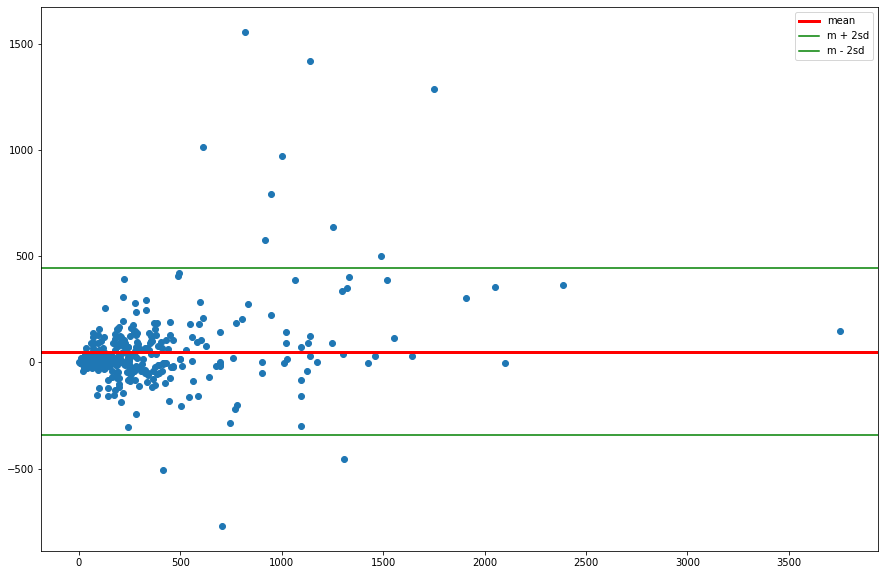

In [22]:
#BLAND ALTMAN 
#0.41 

mean = []
diff = []
for i in range(len(tmtv_0_41_true)):
    subliste = []
    subliste.append(tmtv_0_41_true[i])
    subliste.append(tmtv_0_41_pred[i])
    mean.append(np.mean(subliste))

    diff.append(tmtv_0_41_true[i] - tmtv_0_41_pred[i])
f = plt.figure(figsize=(15,10))
axes = plt.gca()
moy= np.mean(diff)
sd = np.std(diff)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.legend()
plt.scatter(mean, diff)

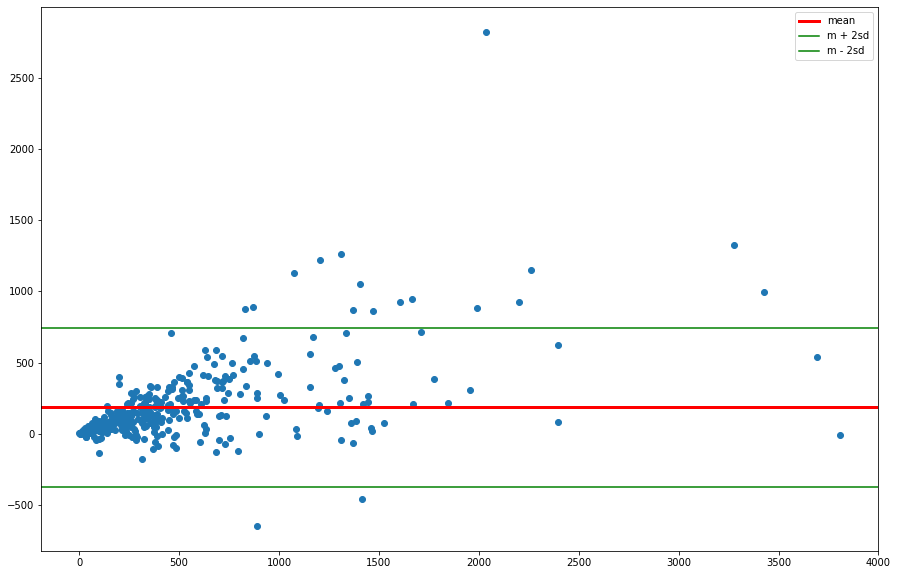

In [23]:
#2.5
mean = []
diff = []
for i in range(len(tmtv_2_5_true)):
    subliste = []
    subliste.append(tmtv_2_5_true[i])
    subliste.append(tmtv_2_5_pred[i])
    mean.append(np.mean(subliste))

    diff.append(tmtv_2_5_true[i] - tmtv_2_5_pred[i])

f = plt.figure(figsize=(15,10))
axes = plt.gca()
moy= np.mean(diff)
sd = np.std(diff)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff)
plt.legend()

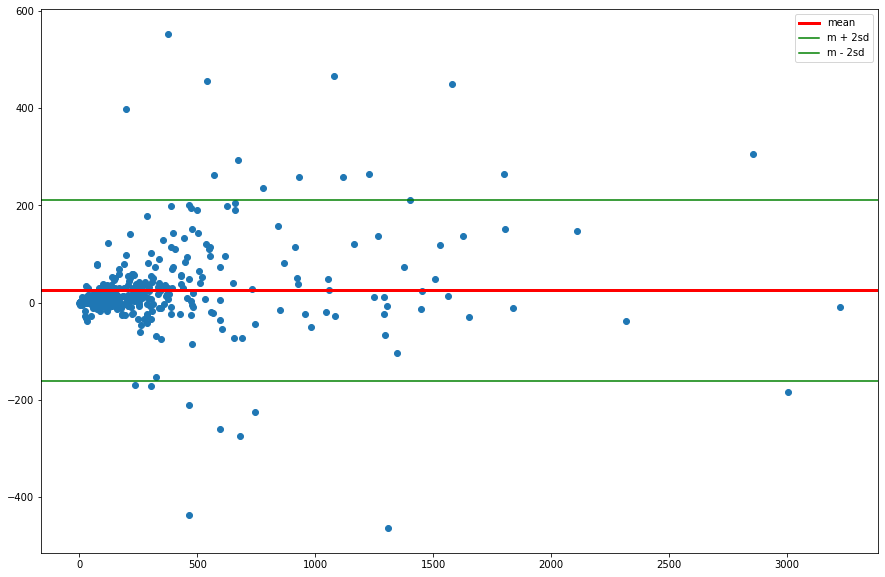

In [24]:
#4.0
mean = []
diff = []
for i in range(len(tmtv_4_0_true)):
    subliste = []
    subliste.append(tmtv_4_0_true[i])
    subliste.append(tmtv_4_0_pred[i])
    mean.append(np.mean(subliste))

    diff.append(tmtv_4_0_true[i] - tmtv_4_0_pred[i])

f = plt.figure(figsize=(15,10))
axes = plt.gca()
moy= np.mean(diff)
sd = np.std(diff)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff)
plt.legend()

In [29]:
#concardance kappa AHL 
csv_path= csv_path= '/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/SEGMENTATION/training/20210621-14:00:08/inference/stats/tmtv/inference_tmtv_dataset.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)
        
del dataset[0] #enlever première ligne

ahl_true = []
ahl_pred = []
for row in dataset : 
    if 'ahl' in row : 
        ahl_pred.append(float(row[-2]))
        ahl_true.append(float(row[-1]))
print(len(ahl_pred))
print(len(ahl_true))


binary_true = []
binary_pred = []

for true in ahl_true : 
    if true < 220 : 
        binary_true.append(0)
    else : binary_true.append(1)

for pred in ahl_pred : 
    if pred < 220 : 
        binary_pred.append(0)
    else : binary_pred.append(1)

109
109


In [30]:
from sklearn.metrics import cohen_kappa_score 

score = cohen_kappa_score(binary_true, binary_pred)
print(score)

0.9062446241183554
